In [2]:
!pip install gym-anytrading gym

In [3]:
!pip install stable-baselines3

In [4]:
!pip install gym

In [5]:
import gymnasium as gym
import gym_anytrading
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1.Bring in Marketwatch Data 

In [7]:
df=pd.read_csv("./data/gmedata.csv")

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [9]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [10]:
df["Date"]=pd.to_datetime(df["Date"])

In [11]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [12]:
df.sort_values("Date",ascending=True,inplace=True)

In [13]:
df.head()

,Date,Open,High,Low,Close,Volume
250,2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
249,2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
248,2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
247,2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
246,2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [14]:
df.set_index("Date",inplace=True)

In [15]:
df.shape

(251, 5)

In [16]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [17]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [18]:
env.prices.shape

C:\Users\manav\anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.prices to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.prices` for environment variables or `env.get_wrapper_attr('prices')` that will search the reminding wrappers.
  logger.warn(


(100,)

In [20]:
env.prices

array([4.37, 4.23, 3.77, 4.19, 3.76, 3.81, 4.16, 4.17, 4.41, 4.22, 3.65,
       3.5 , 3.25, 2.85, 2.8 , 3.09, 3.27, 3.41, 3.89, 4.74, 5.95, 5.27,
       5.03, 4.88, 5.61, 4.78, 4.89, 4.7 , 4.77, 5.82, 5.64, 6.04, 5.73,
       6.05, 5.48, 5.39, 4.93, 4.87, 4.98, 4.76, 4.54, 4.21, 4.13, 4.22,
       4.58, 4.44, 4.43, 4.44, 4.18, 4.42, 4.69, 4.33, 4.06, 4.13, 4.18,
       4.44, 4.47, 4.14, 5.01, 4.96, 5.07, 4.37, 4.72, 4.69, 4.64, 4.76,
       4.95, 4.88, 4.87, 4.83, 4.41, 4.46, 4.35, 4.38, 4.34, 4.44, 4.29,
       4.24, 4.09, 4.26, 4.21, 4.34, 4.26, 4.08, 4.19, 4.17, 3.96, 3.85,
       4.01, 4.11, 4.11, 4.03, 4.01, 3.94, 4.06, 4.1 , 4.01, 4.15, 4.43,
       4.63], dtype=float32)

In [19]:
env.signal_features

C:\Users\manav\anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 4.37,  0.  ],
       [ 4.23, -0.14],
       [ 3.77, -0.46],
       [ 4.19,  0.42],
       [ 3.76, -0.43],
       [ 3.81,  0.05],
       [ 4.16,  0.35],
       [ 4.17,  0.01],
       [ 4.41,  0.24],
       [ 4.22, -0.19],
       [ 3.65, -0.57],
       [ 3.5 , -0.15],
       [ 3.25, -0.25],
       [ 2.85, -0.4 ],
       [ 2.8 , -0.05],
       [ 3.09,  0.29],
       [ 3.27,  0.18],
       [ 3.41,  0.14],
       [ 3.89,  0.48],
       [ 4.74,  0.85],
       [ 5.95,  1.21],
       [ 5.27, -0.68],
       [ 5.03, -0.24],
       [ 4.88, -0.15],
       [ 5.61,  0.73],
       [ 4.78, -0.83],
       [ 4.89,  0.11],
       [ 4.7 , -0.19],
       [ 4.77,  0.07],
       [ 5.82,  1.05],
       [ 5.64, -0.18],
       [ 6.04,  0.4 ],
       [ 5.73, -0.31],
       [ 6.05,  0.32],
       [ 5.48, -0.57],
       [ 5.39, -0.09],
       [ 4.93, -0.46],
       [ 4.87, -0.06],
       [ 4.98,  0.11],
       [ 4.76, -0.22],
       [ 4.54, -0.22],
       [ 4.21, -0.33],
       [ 4.13, -0.08],
       [ 4.

# 2.Build Environment

In [60]:
env.action_space

Discrete(2)

C:\Users\manav\anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


info {'total_reward': -27.460006713867188, 'total_profit': 0.7748260181907846, 'position': <Positions.Short: 0>}


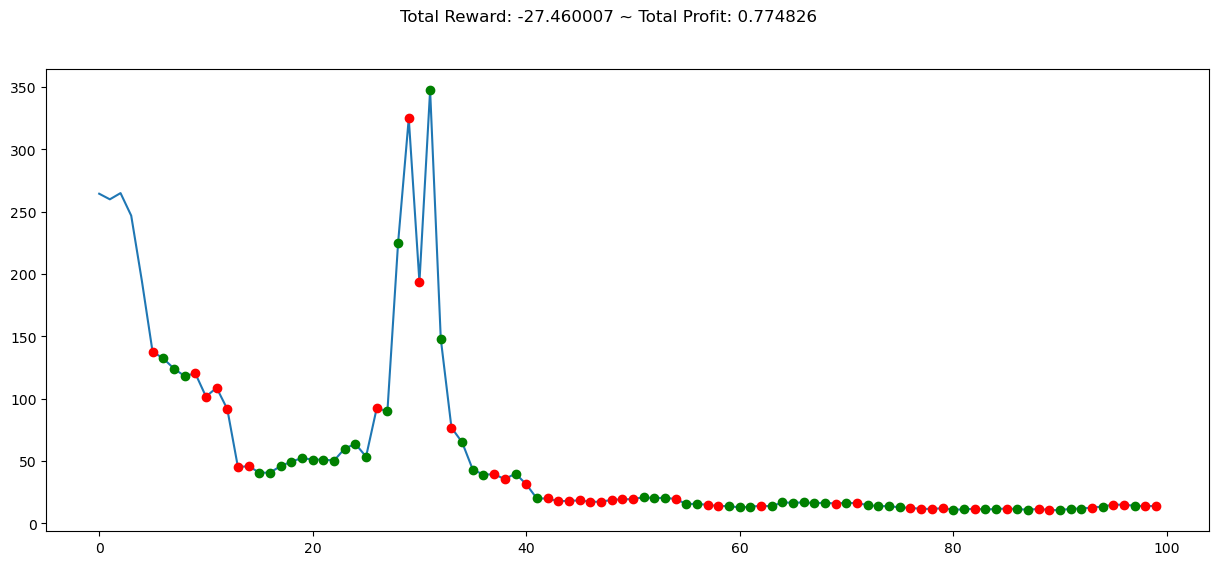

In [109]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## 2.1 Install and Import New Dependencies 

In [36]:
pip install finta

  Using cached finta-1.3-py3-none-any.whl (29 kB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
from gym_anytrading.envs import StocksEnv

In [38]:
from finta import TA

## 2.2 Fix Volume Column 

In [39]:
df["Volume"]

Date
2020-03-16     4,866,696
2020-03-17     3,562,210
2020-03-18     3,651,709
2020-03-19     5,039,539
2020-03-20     7,722,194
                 ...    
2021-03-08    63,565,621
2021-03-09    39,099,328
2021-03-10    71,570,570
2021-03-11    28,312,490
2021-03-12    25,845,900
Name: Volume, Length: 251, dtype: object

In [40]:
df["Volume"]=df["Volume"].apply(lambda x: float(x.replace(",","")))

In [41]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## 2.3 Calculate SMA, RSI and OBV 

In [42]:
df["SMA"]=TA.SMA(df,12)
df["RSI"]=TA.RSI(df)
df["OBV"]=TA.OBV(df)
df.fillna(0,inplace=True)

In [43]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.000000,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.000000,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.000000,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.000000,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.000000,29.351457,-9896574.0
2020-03-23,3.58,3.86,3.50,3.81,6009784.0,0.000000,32.102964,-3886790.0
2020-03-24,3.95,4.21,3.89,4.16,6805659.0,0.000000,47.512950,2918869.0
2020-03-25,4.15,4.49,4.04,4.17,3592059.0,0.000000,47.876947,6510928.0
2020-03-26,4.24,4.71,4.24,4.41,6210979.0,0.000000,55.799557,12721907.0


## 2.4 Create New Environments 

In [56]:
def add_signals(env):
    start=env.frame_bound[0]-env.window_size
    end=env.frame_bound[1]
    prices=env.df.loc[:,"Low"].to_numpy()[start:end]
    signal_features=env.df.loc[:,["Low","Volume","SMA","RSI","OBV"]].to_numpy()[start:end]
    return prices,signal_features

In [57]:
class MyCustomEnv(StocksEnv):
    _process_data=add_signals
    
env2=MyCustomEnv(df=df,window_size=12,frame_bound=(12,50))

In [58]:
env2.signal_features

array([[ 3.90000000e+00,  4.86669600e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.11000000e+00,  3.56221000e+06,  0.00000000e+00,
         0.00000000e+00, -3.56221000e+06],
       [ 3.50000000e+00,  3.65170900e+06,  0.00000000e+00,
         0.00000000e+00, -7.21391900e+06],
       [ 3.55000000e+00,  5.03953900e+06,  0.00000000e+00,
         4.33948339e+01, -2.17438000e+06],
       [ 3.65000000e+00,  7.72219400e+06,  0.00000000e+00,
         2.93514572e+01, -9.89657400e+06],
       [ 3.50000000e+00,  6.00978400e+06,  0.00000000e+00,
         3.21029638e+01, -3.88679000e+06],
       [ 3.89000000e+00,  6.80565900e+06,  0.00000000e+00,
         4.75129499e+01,  2.91886900e+06],
       [ 4.04000000e+00,  3.59205900e+06,  0.00000000e+00,
         4.78769470e+01,  6.51092800e+06],
       [ 4.24000000e+00,  6.21097900e+06,  0.00000000e+00,
         5.57995572e+01,  1.27219070e+07],
       [ 4.15000000e+00,  7.02476300e+06,  0.00000000e+00,
         4.93981406e+01

Earlier signal features were the low price and the difference between the next and current price

Now we have provided the model with more features i.e. the indicators from technical analysis of finance 

In [59]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.0,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.0,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.0,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.0,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.0,29.351457,-9896574.0


# Build Environment and Train  

In [61]:
env_maker=lambda:env2
env=DummyVecEnv([env_maker])

In [62]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 375      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.678   |
|    explained_variance | 0.204    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0857  |
|    value_loss         | 0.0553   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 388      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.647   |
|    explained_variance | 0.197    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.267   |
|    value_loss      

KeyboardInterrupt: 

# 4.Evaluation

In [69]:
env=MyCustomEnv(df=df,frame_bound=(80,250),window_size=12)
obs,_=env.reset()
while True:
    obs=obs[np.newaxis,:]
    action,_states=model.predict(obs)
    obs,rewards,truncated,terminated,info=env.step(action)
    done=truncated or terminated
    if done:
        print("info",info)
        break
    

info {'total_reward': 11.86, 'total_profit': 36.75160209831894, 'position': <Positions.Long: 1>}


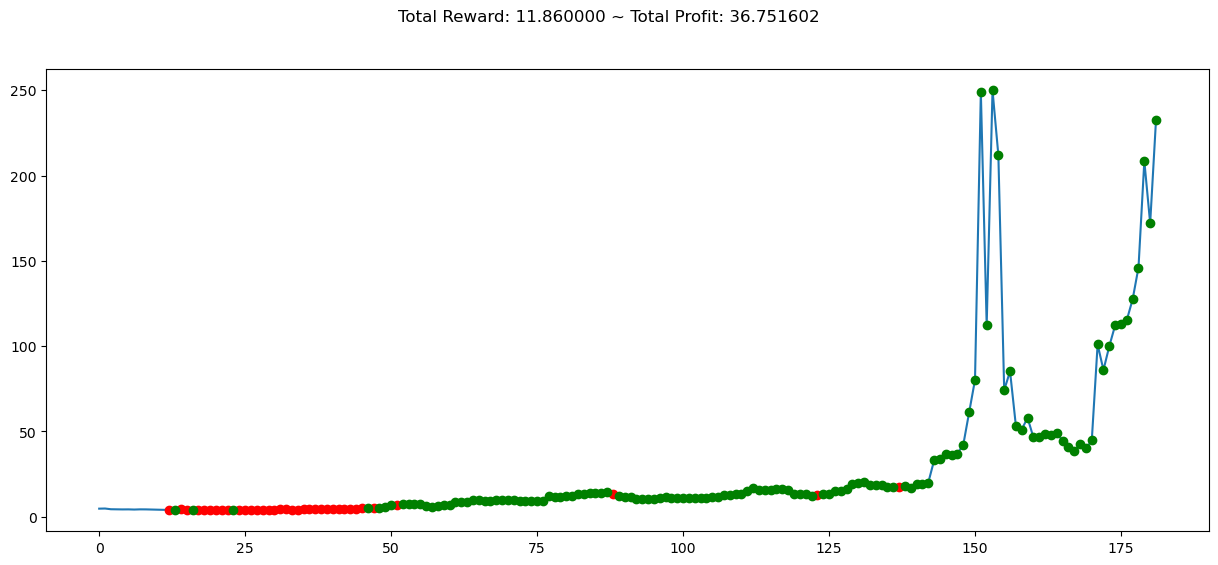

In [70]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# THAT'S 5275% PROFIT...THE MODEL HAS WORKED AMAZINGLY

# ATTEMPT 2: 3675% PROFIT!!! 